<a href="https://colab.research.google.com/github/Gasijiyo/FirstStep_Python/blob/master/py21_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 셋

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.shape

(244, 7)

# `matplotlib.pyplot` 모듈을 사용한 시각화

1. `figure` 객체 생성
1. `figure` 객체에 `subplot`을 생성해서 추가
1. subplot에 그래프를 그림.
1. 그래프의 여러가지 옵션들을 설정.
1. 그래프 보여주기.

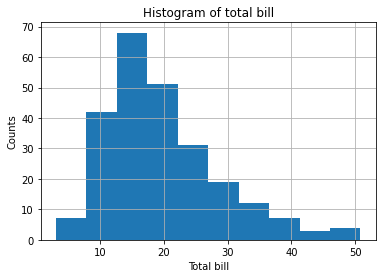

In [5]:
# 1. figure 객체 생성.
fig = plt.figure()

# 2. figure 객체에 subplot 생성 추가.
axis = fig.add_subplot(1,1,1)  
# add_subplot(nrows, ncols, index):
# nrows: 행의 개수, ncols: 열(컬럼)의 개수, index: subplot의 인덱스
# subplot의 인덱스는 '1' 부터 시작.!! 

# 3. subplot에 그래프를 그림.
axis.hist(x=tips['total_bill']) # histogram(히스토그램)

# 4. 그래프 옵션 설정
axis.set_title('Histogram of total bill')
axis.set_xlabel('Total bill')
axis.set_ylabel('Counts')
axis.grid()

# 5. 그래프 보여주기
plt.show()

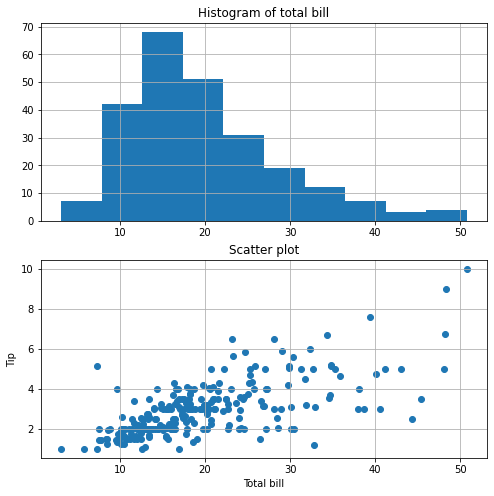

In [6]:
fig = plt.figure(figsize=(8,8))

axis1 = fig.add_subplot(2,1,1)
axis2 = fig.add_subplot(212)

axis1.hist(x=tips['total_bill'])
axis2.scatter(x=tips['total_bill'], y=tips['tip'])

axis1.set_title('Histogram of total bill')
axis1.grid()
axis2.grid()
axis2.set_title('Scatter plot')
axis2.set_xlabel('Total bill')
axis2.set_ylabel('Tip')

plt.show()

2개의 subplot을 좌/우로 배치해서 그래프 그리기

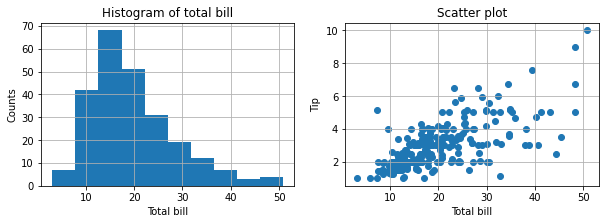

In [7]:
fig = plt.figure(figsize=(10,3))

axis1 = fig.add_subplot(1,2,1)
axis2 = fig.add_subplot(122)

axis1.hist(x=tips['total_bill'])
axis2.scatter(x=tips['total_bill'], y=tips['tip'])

axis1.set_title('Histogram of total bill')
axis1.set_xlabel('Total bill')
axis1.set_ylabel('Counts')
axis1.grid()

axis2.set_title('Scatter plot')
axis2.set_xlabel('Total bill')
axis2.set_ylabel('Tip')
axis2.grid()

plt.show()

`plt.subplots()`: figure 객체 생성(`plt.figure()`) + subplot 추가(figure.add_subplot())

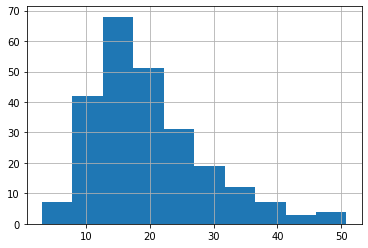

In [8]:
# figure 객체 생성 + subplot 추가
fig, ax = plt.subplots()    # nrows=1, ncols=1
# fig: Figure 클래스의 객체
# ax : Subplot 객체 또는 Subplot 객체들의 리스트

# subplot 에 그래프 그림.
ax.hist(x=tips['total_bill'])

# 그래프 옵션
ax.grid()

# 그래프 보여주기
plt.show()

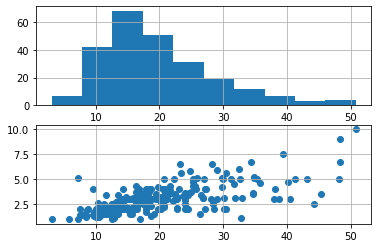

In [9]:
# plt.subplots() 함수를 사용해 상하 배치
fig, ax = plt.subplots(nrows=2, figsize=(8, 8))

ax[0].hist(x=tips['total_bill'])
ax[1].scatter(x=tips['total_bill'], y=tips['tip'])

ax[0].grid()
ax[1].grid()

plt.show()

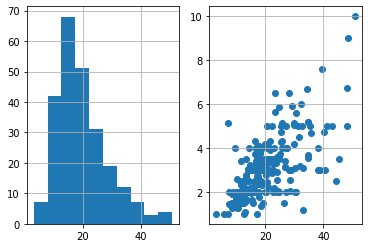

In [10]:
# plt.subplots() 함수를 사용해서 좌/우로 배치한 그래프 2개(hist, scatter)
fig, ax = plt.subplots(ncols=2, figsize=(12, 3))

ax[0].hist(x=tips['total_bill'])
ax[1].scatter(x=tips['total_bill'], y=tips['tip'])

ax[0].grid()
ax[1].grid()

plt.show()

Figure 객체에 한 개의 subplot만 있는 경우에는 `matplotlib.pyplot` 모듈의 top-level 함수들 (`plot, scatter, hist, ...`)을 사용해 간단히 그래프를 그릴 수 있음.  

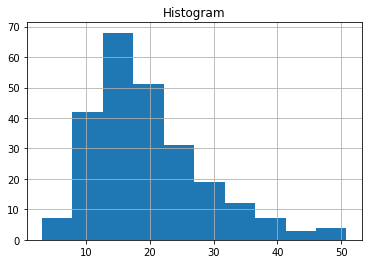

In [11]:
# Figure 생성 + 1개의 subplot을 추가 + 히스토그램 그림
plt.hist(x=tips['total_bill'])

# 옵션 설정
plt.title('Histogram of total bill')
plt.grid()

# 그래프 보여주기
plt.show()

# Box Plot

숫자 타입 변수의 기술 통계량 (descriptive statistics)을 시각화
* 최소값, 최대값, 4분위값(25%, 중앙값, 75%)

In [13]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

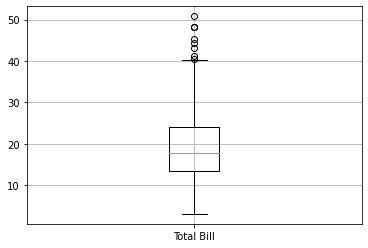

In [15]:
plt.boxplot(x=tips['total_bill'], labels=['Total Bill'])
plt.grid()
plt.show()

In [17]:
# IQR(Inter-quartile range) : 박스 크기(75% - 25%)
iqr = 24.127500 - 13.347500
iqr

10.780000000000001

In [18]:
upper_fence = 24.127500 + iqr * 1.5 # upper_fence = 75% + iqr * 1.5
upper_fence

40.2975

In [19]:
lower_fence = 13.347500 - iqr * 1.5 # lower_fence = 25% - iqr * 1.5
lower_fence

-2.8225000000000016

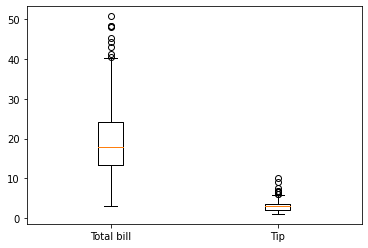

In [21]:
# total_bill, tip의 box plot
plt.boxplot(x=[tips['total_bill'], tips['tip']], labels=['Total bill', 'Tip'])
plt.show()

성별 tip의기술 통계량을 시각화 - 남성/여성의 tip의 최소값, 최대값, 4분위수

In [29]:
tips['sex'].unique()

# plt.boxplot(x=tips['tip'], labels=['Tip'])
# plt.grid()
# plt.show()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [34]:
# 여성들의 tip
female_tip = tips[tips['sex']=='Female']['tip']
female_tip

0      1.01
4      3.61
11     5.00
14     3.02
16     1.67
       ... 
226    2.00
229    2.88
238    4.67
240    2.00
243    3.00
Name: tip, Length: 87, dtype: float64

In [33]:
male_tip = tips[tips['sex']=='Male']['tip']
male_tip

1      1.66
2      3.50
3      3.31
5      4.71
6      2.00
       ... 
236    1.00
237    1.17
239    5.92
241    2.00
242    1.75
Name: tip, Length: 157, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


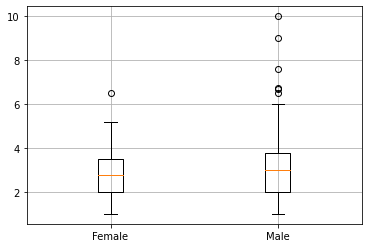

In [45]:
plt.boxplot(x=[female_tip, male_tip], labels=['Female','Male'])
plt.grid()
plt.show()

요일별 tip의 기술 통계량 시각화

In [55]:
days = tips['day'].unique()
days

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [50]:
tip_sun = tips[tips['day']=='Sun']['tip']
tip_sat = tips[tips['day']=='Sat']['tip']
tip_fri = tips[tips['day']=='Fri']['tip']
tip_thu = tips[tips['day']=='Thur']['tip']

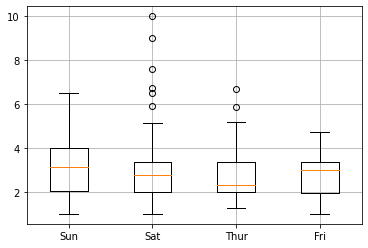

In [54]:
plt.boxplot(x=np.array([tip_sun, tip_sat, tip_thu, tip_fri], dtype=object),
            labels=['Sun', 'Sat', 'Thur', 'Fri'])
plt.grid()
plt.show()

In [56]:
days = tips['day'].unique()
days

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

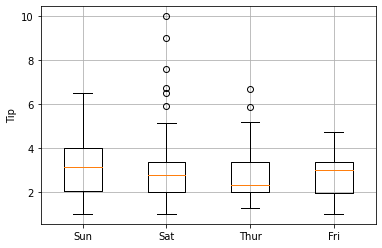

In [59]:
tip_by_day = [] # 요일별 팁을 저장하기 위한 빈 리스트
for d in days:
    tip = tips[tips['day'] == d]['tip']
    tip_by_day.append(tip)

plt.boxplot(x=np.array(tip_by_day, dtype=object), labels=days)
plt.grid()
plt.ylabel('Tip')
plt.show()

# 히스토그램(Histogram)

연속형 자료를 구간으로 나눠서 구간 안에 포함된 자료의 수를 막대로 표현한 그래프

In [60]:
tips.head() # 여기서 연속형 자료는 totalbill, tip.
# 0.0001, 음수 부터 무한대까지 가능하기 때문

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


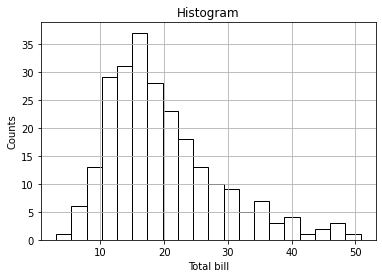

In [65]:
# 영수증 그램의 히스토그램
plt.hist(x=tips['total_bill'], bins=20, edgecolor='black', color='white')
#> bins = 막대 개수, 구간
#> color = 막대를 채우는 색깔
#> edgecolor = 막대 경계 색깔

plt.title('Histogram')
plt.xlabel('Total bill')
plt.ylabel('Counts')
plt.grid()
plt.show()

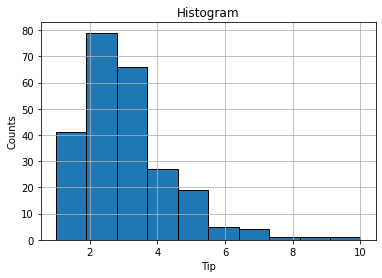

In [72]:
# 팁의 히스토그램
plt.hist(x=tips['tip'], edgecolor = 'black')
plt.title('Histogram')
plt.xlabel('Tip')
plt.grid()
plt.show()

# Bar plot

카테고리 타입 변수의 빈도수를 막대로 표현한 그래프

In [73]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [76]:
# 성별 빈도수 - 남성/여성 숫자
gender_counts = tips['sex'].value_counts()
gender_counts   #> pd.Series

pandas.core.series.Series

In [77]:
gender_counts.index

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category')

In [78]:
gender_counts.values

array([157,  87])

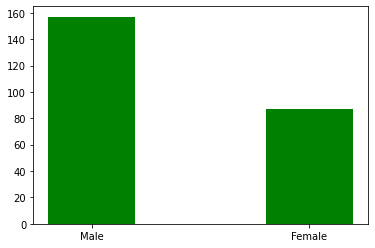

In [83]:
plt.bar(x=gender_counts.index, height=gender_counts.values, width=0.4, color='green')
plt.show()

가로 막대 그래프(horizontal bar plot)

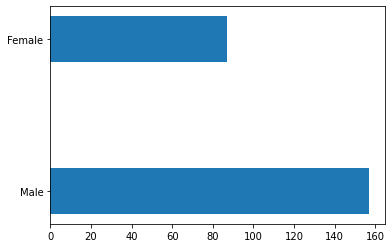

In [88]:
plt.barh(y=gender_counts.index, width=gender_counts.values, height=0.3)
plt.show()

요일별 빈도수 세로/가로 막대그래프

In [108]:
day_counts = tips['day'].value_counts()
day_counts

day_counts.values

array([87, 76, 62, 19])

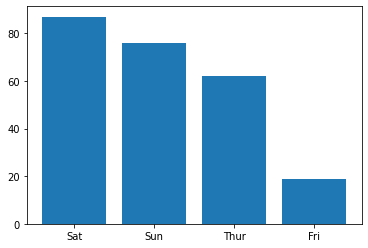

In [109]:
plt.bar(x=day_counts.index, height=day_counts.values)
plt.show()

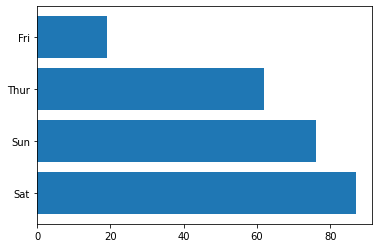

In [110]:
plt.barh(y=day_counts.index, width=day_counts.values)
plt.show()

size(테이블 손님 수) 별 빈도수 세로막대그래프

In [104]:
size_counts = tips['size'].value_counts()
size_counts

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

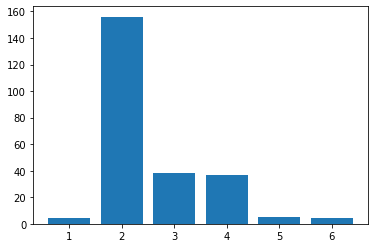

In [107]:
plt.bar(x=size_counts.index, height=size_counts.values)
plt.show()

# 산점도(Scatter Plot)

두 변수 사이의 상관 관계를 파악하기 위해서 사용.

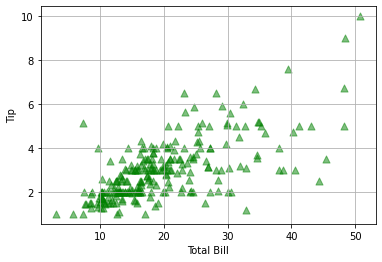

In [135]:
# tip ~ total_bill 관계를 산점도로 시각화 
# y축(종속변수) ~ x축(독립변수)
plt.scatter(x=tips['total_bill'], y=tips['tip'],
            alpha=0.5, marker='^', s=50, color='green')
# alpha: 불투명도(0.0 ~ 1.0(불투명))
# marker: 점의 모양(o,s,^,v,+,*, ...)
# s: 점의 크기 size
# color: 점의 색깔
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid()
plt.show()

`tip ~ size` scatter plot

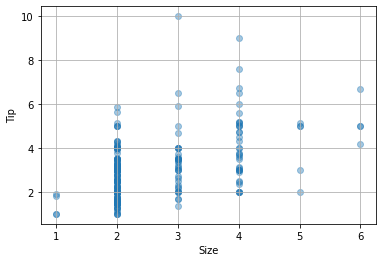

In [137]:
plt.scatter(x=tips['size'], y=tips['tip'], alpha=0.4)
plt.xlabel('Size')
plt.ylabel('Tip')

plt.grid()
plt.show()

# 선 그래프(Line plot)

주로 시계열 데이터(시간에 따라서 변하는 데이터)를 시각화

In [139]:
np.random.seed(1)   # 난수 발생 순서 고정
df = pd.DataFrame(data={'x1': np.arange(10),
                        'x2': np.random.rand(10)})
df

,x1,x2
0,0,0.417022
1,1,0.720324
2,2,0.000114
3,3,0.302333
4,4,0.146756
5,5,0.092339
6,6,0.186260
7,7,0.345561
8,8,0.396767
9,9,0.538817


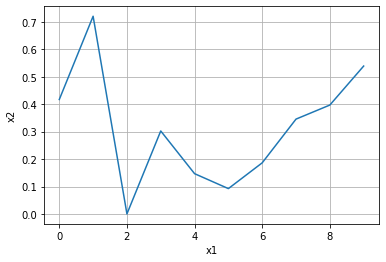

In [142]:
# x2 ~ x1 line graph
plt.plot(df['x1'], df['x2'])

plt.grid()
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

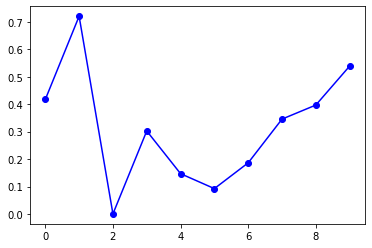

In [143]:
plt.plot(df['x1'], df['x2'], 'bo-')
# 'bo-': format string(선 그래프의 형식을 지정한 문자열) color, marker, linestyle을 설정
# color: 마커(점)와 선의 색깔(r,g,b,k, ...) 
# marker: 마커(점) 모양 (o,s,^, ...)
# linestyle: 선의 모양(-, --, :, ...). solid line, dashed line, dotted line
# 선 그래프의 형식은 format string으로 지정할 수도 있고 variable-length keyword argumnet(**kwargs)로도 설정 가능.


plt.show()

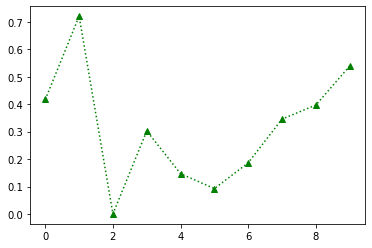

In [152]:
# variable-length keyword argument를 사용한 선 그래프 모양 변경
plt.plot(df['x1'], df['x2'], 
         color='green', marker='^', linestyle='dotted') #linestyle=':'

plt.show()

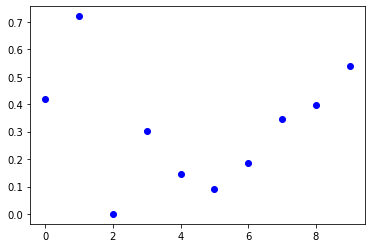

In [153]:
# plot() 함수를 사용한 scatter plot - marker 적용, linestyle 없앰
plt.plot(df['x1'], df['x2'], 'bo')
# color='blue', marker='o', linestyle=''

plt.show()

하나의 plot에 여러개의 선 그래프를 함께 그리기

In [154]:
np.random.seed(1)

df = pd.DataFrame(data={'x':np.arange(10),
                        'y1': np.random.rand(10),
                        'y2': np.random.rand(10),
                        'y3': np.random.rand(10),})
df

,x,y1,y2,y3
0,0,0.417022,0.419195,0.800745
1,1,0.720324,0.685220,0.968262
2,2,0.000114,0.204452,0.313424
3,3,0.302333,0.878117,0.692323
4,4,0.146756,0.027388,0.876389
5,5,0.092339,0.670468,0.894607
6,6,0.186260,0.417305,0.085044
7,7,0.345561,0.558690,0.039055
8,8,0.396767,0.140387,0.169830
9,9,0.538817,0.198101,0.878143


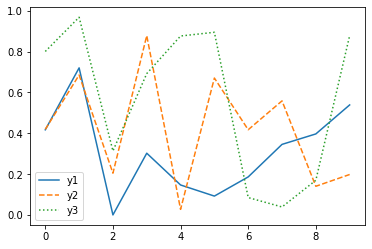

In [162]:
# y1 ~ x
plt.plot(df['x'], df['y1'], label='y1', linestyle='solid')
# y2 ~ x
plt.plot(df['x'], df['y2'], label='y2', linestyle='dashed')
# y3 ~ x
plt.plot(df['x'], df['y3'], label='y3', linestyle='dotted')

plt.legend()    # 각 plot의 label의 화면에 표시(범례)

plt.show()

# Exercises

In [213]:
tips.head(10)
tips.day.dtype

CategoricalDtype(categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False)

## Ex 1.

* 4개의 Subplot을 2개 행, 2개 열에 배치.
* 4개의 Subplot에 성별 빈도수, 흡연여부 빈도수, 요일 빈도수, 시간 빈도수 그래프를 그리세요.

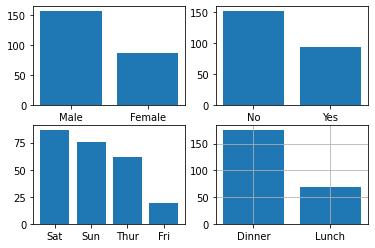

In [203]:
gender_counts = tips['sex'].value_counts()
smoke_counts = tips['smoker'].value_counts()
day_counts = tips['day'].value_counts()
time_counts = tips['time'].value_counts()

fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0,0].bar(x=gender_counts.index, height=gender_counts.values)
ax[0,1].bar(x=smoke_counts.index, height=smoke_counts.values)
ax[1,0].bar(x=day_counts.index, height=day_counts.values)
ax[1,1].bar(x=time_counts.index, height=time_counts.values)

plt.grid()
plt.show()

## Ex 2.

* 성별로 점의 색깔이 다르게 표시되는 `tip ~ total_bill` scatter plot을 그리세요.
* 범례 반드시 표시.

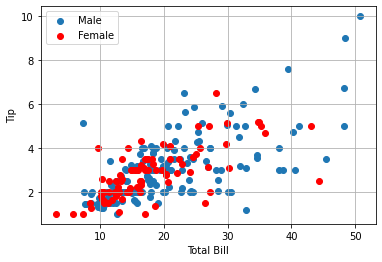

In [269]:
maleTip = tips[tips['sex']=='Male']['tip']
femaleTip = tips[tips['sex']=='Female']['tip']
maleBill = tips[tips['sex']=='Male']['total_bill']
femaleBill = tips[tips['sex']=='Female']['total_bill']

plt.scatter(x=maleBill, y=maleTip, label='Male')
plt.scatter(x=femaleBill, y=femaleTip, color='red', label='Female')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()

plt.grid()
plt.show()

## Ex 3.

* 요일별로 점의 색깔과 모양이 다르게 표시되는 `tip ~ total_bill` scatter plot을 그리세요.
* 범례 반드시 표시.

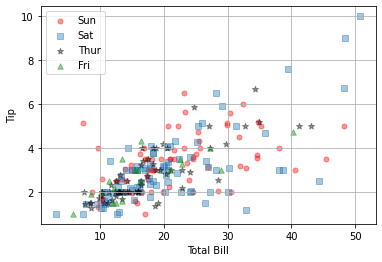

In [237]:
sunTip = tips[tips['day']=='Sun']['tip']
satTip = tips[tips['day']=='Sat']['tip']
thurTip = tips[tips['day']=='Thur']['tip']
friTip = tips[tips['day']=='Fri']['tip']

sunBill = tips[tips['day']=='Sun']['total_bill']
satBill = tips[tips['day']=='Sat']['total_bill']
thurBill = tips[tips['day']=='Thur']['total_bill']
friBill = tips[tips['day']=='Fri']['total_bill']

plt.scatter(x=sunBill, y=sunTip, color='red', s=25, alpha=0.4, label='Sun')
plt.scatter(x=satBill, y=satTip, marker='s', s=30, alpha=0.4, label='Sat')
plt.scatter(x=thurBill, y=thurTip, color='black', marker='*', s=40, alpha=0.4, label='Thur')
plt.scatter(x=friBill, y=friTip, color='green', marker='^', s=30, alpha=0.4, label='Fri')


plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()

plt.grid()
plt.show()

## Ex 4.

* seaborn 패키지의 iris 예제 데이터 셋을 DataFrame으로 생성.
* DataFrame의 구조 확인.
    * row 개수, column 개수/이름, 기술통계량, ...
* `petal_width ~ petal_length` scatter plot 그리세요.
    * species별로 점의 색깔이 다르게 표현. 범례 표시.

In [248]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [258]:
iris.shape

(150, 5)

In [240]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [257]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

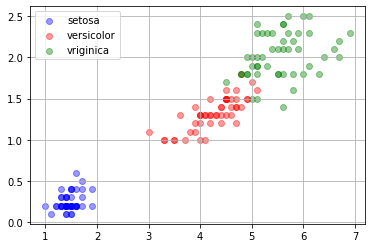

In [267]:
set_length = iris[iris['species']=='setosa']['petal_length']
ver_length = iris[iris['species']=='versicolor']['petal_length']
vir_length = iris[iris['species']=='virginica']['petal_length']

set_width = iris[iris['species']=='setosa']['petal_width']
ver_width = iris[iris['species']=='versicolor']['petal_width']
vir_width = iris[iris['species']=='virginica']['petal_width']

plt.scatter(x=set_length, y=set_width, color='blue', alpha=0.4, label='setosa')
plt.scatter(x=ver_length, y=ver_width, color='red', alpha=0.4, label='versicolor')
plt.scatter(x=vir_length, y=vir_width, color='green', alpha=0.4, label='vriginica')

plt.legend()
plt.grid()
plt.show()